In [1]:
import pandas as pd

file_path = '..\\result\\MS_data_histone_relative_2+.xlsx' 

histone_data = pd.ExcelFile(file_path)

WT_df = pd.read_excel(histone_data, sheet_name=histone_data.sheet_names[3])
efs_mutant_df = pd.read_excel(histone_data, sheet_name=histone_data.sheet_names[0])

In [2]:
def export_fasta(df, filename):
    with open(filename, "w") as f:
        df = df.sort_values(by='Protein_Name', ascending = True)
        for _, row in df.iterrows():
            if ("deacetylase" in row['Protein_Name']): continue
            if ("methyltransferase" in row['Protein_Name']): continue
            f.write(f">{row['Protein_Name'].replace(' ','_')}_(MS_detect={row['MS_detect_times']})\n{row['Protein_sequence']}\n")

export_fasta(WT_df, "WT.fasta")
export_fasta(efs_mutant_df, "efs_mutant.fasta")

In [3]:
import subprocess

def call_clustalo_omega(input_fasta, output_fasta):

    command = ["clustalo", "-i", input_fasta, "-o", output_fasta, "--outfmt", "fasta", '--force']
    try:
        res = subprocess.run(command, check=True)
    except Exception as E:
        display(E)
    
    print(f"return code = {res.returncode}")

call_clustalo_omega("efs_mutant.fasta", 'efs_mutant_clustalo_result.fasta')
call_clustalo_omega("WT.fasta", 'WT_clustalo_result.fasta')

return code = 0
return code = 0


In [4]:
from plot import plot

using defual black color for y_labels
num seq = 24
Current y-tick spacing: 1


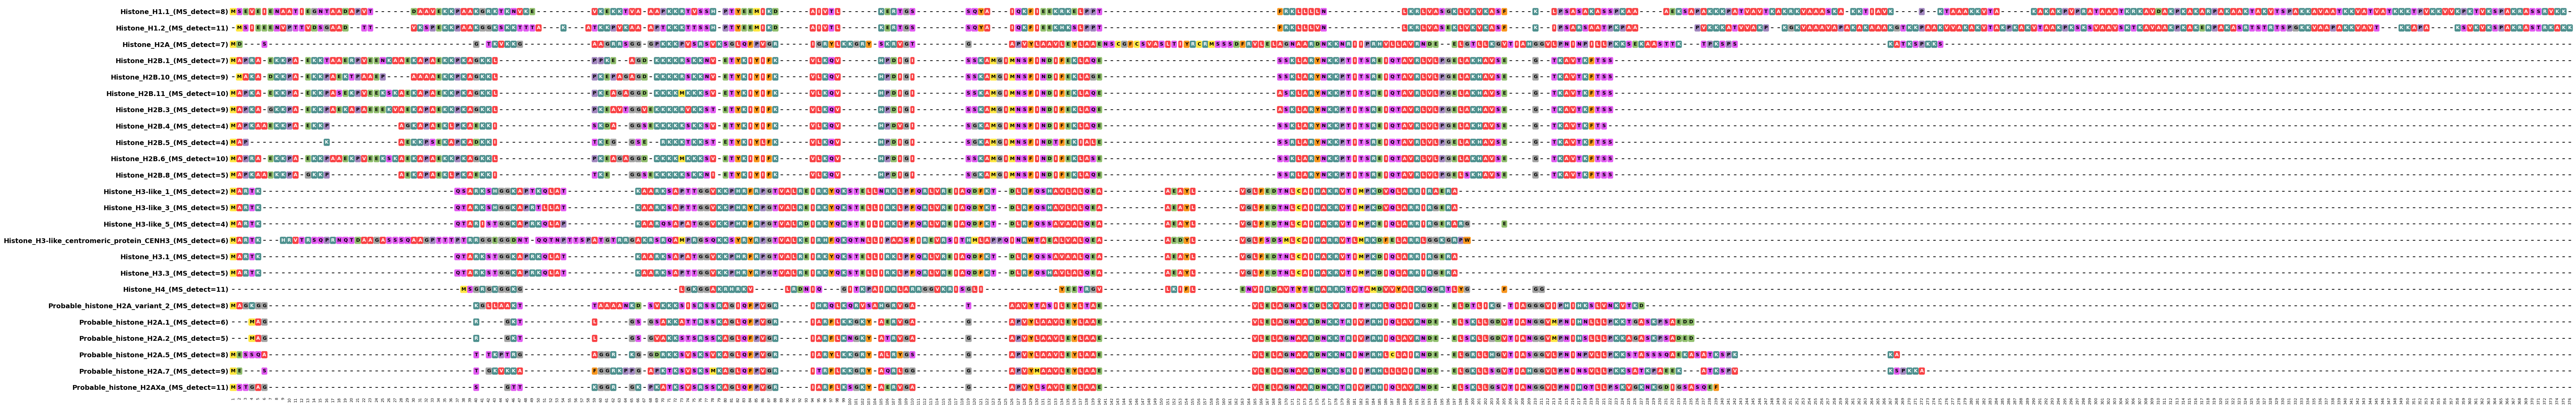

In [6]:
plot(input_file_path='WT_clustalo_result.fasta', output_file_path='WT_sequence_alignment')
# plot("efs_mutant")

using defual black color for y_labels
num seq = 25
Current y-tick spacing: 1


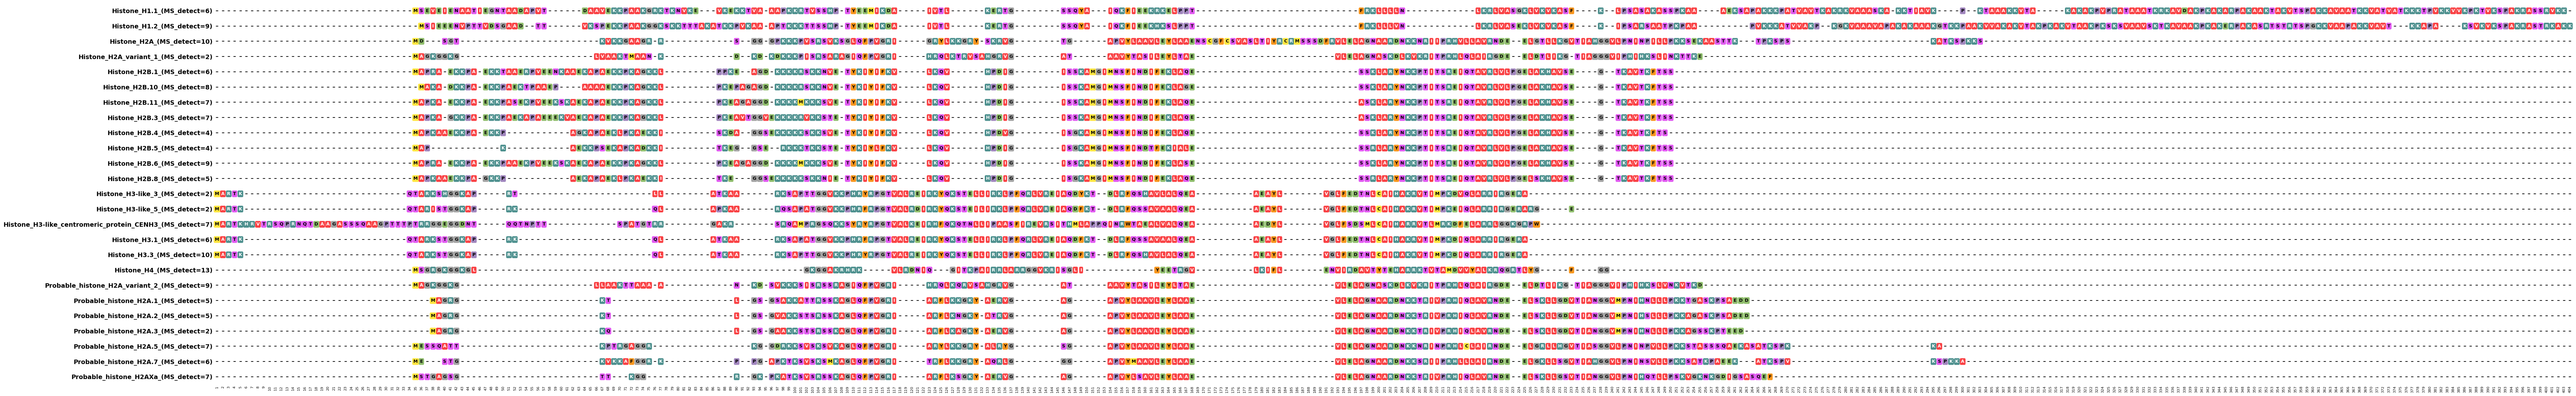

In [7]:
plot(input_file_path='efs_mutant_clustalo_result.fasta', output_file_path='efs_mutant_sequence_alignment')

using defual black color for y_labels
num seq = 3
Current y-tick spacing: 1


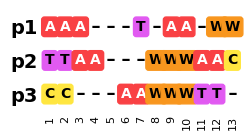

In [8]:
plot(input_file_path="..\\data\\test_clustalo_result.fasta", output_file_path="..\\data\\test")